# Generate training and prediction data from insitu and gridded datasets

More datasets are here https://dap.tern.org.au/thredds/catalog/ecosystem_process/ozflux/catalog.html



## Load modules

In [1]:
import sys
sys.path.append('/g/data/os22/chad_tmp/NEE_modelling/')
from collect_training_data import extract_ec_gridded_data

## Collect training data from EC towers, and gridded data at pixel location of EC tower

This data is used for training the models.


In [2]:
suffixes = [
    'Emerald/2022_v2/L6/default/Emerald_L6_20110610_20131231_Monthly.nc',
    'GreatWesternWoodlands/2022_v2/L6/default/GreatWesternWoodlands_L6_20130101_20220601_Monthly.nc',
    'CowBay/2022_v2/L6/default/CowBay_L6_20090101_20220816_Monthly.nc',
    'Tumbarumba/2022_v2/L6/default/Tumbarumba_L6_20020107_20220530_Monthly.nc',
    'Whroo/2022_v2/L6/default/Whroo_L6_20111201_20220821_Monthly.nc',
    'WombatStateForest/2022_v2/L6/default/WombatStateForest_L6_20100120_20210529_Monthly.nc',
    'WallabyCreek/2022_v2/L6/default/WallabyCreek_L6_20050825_20130409_Monthly.nc',
    'RobsonCreek/2022_v2/L6/default/RobsonCreek_L6_20130801_20220816_Monthly.nc',
    'CapeTribulation/2022_v2/L6/default/CapeTribulation_L6_20100101_20181102_Monthly.nc',
    'AliceSpringsMulga/2022_v2/L6/default/AliceSpringsMulga_L6_20100903_20220806_Monthly.nc',
    'CalperumChowilla/2022_v2/L6/default/Calperum_L6_20100730_20220829_Monthly.nc',
    'DryRiver/2022_v2/L6/default/DryRiver_L6_20091025_20220820_Monthly.nc',
    'Litchfield/2022_v2/L6/default/Litchfield_L6_20150623_20220513_Monthly.nc',
    'SturtPlains/2022_v2/L6/default/SturtPlains_L6_20080828_20220513_Monthly.nc',
    'RiggsCreek/2022_v2/L6/default/RiggsCreek_L6_20110101_20170712_Monthly.nc', #dryland cropping
    'Otway/2022_v2/L6/default/Otway_L6_20070811_20110101_Monthly.nc', # pasture site
    'Yanco/2022_v2/L6/default/Yanco_L6_20130101_20220821_Monthly.nc', # soil site
    
    ## check the location of these ones below as they are new additions
    'Gingin/2022_v2/L6/default/Gingin_L6_20111013_20210614_Monthly.nc', # native Banksia woodland
    'LongreachMitchellGrassRangeland/2022_v2/L6/default/Longreach_L6_20181009_20220607_Monthly.nc',
    'Ridgefield/2022_v2/L6/default/Ridgefield_L6_20160101_20220821_Monthly.nc', #  dryland agriculture
    'SilverPlains/2022_v2/L6/default/SilverPlains_L6_20200101_20211231_Monthly.nc', #Australian Mountain Reseach 
    'Collie/2022_v2/L6/default/Collie_L6_20170804_20191111_Monthly.nc', # wandoo woodland
    'AdelaideRiver/2022_v2/L6/default/AdelaideRiver_L6_20071017_20090524_Monthly.nc', #  Savanna dominated by Eucalyptus
    'Warra/2022_v2/L6/default/Warra_L6_20130305_20210921_Monthly.nc', #tasmania
    
    ### ----------Problematic sites--------
    'DalyPasture/2022_v2/L6/default/DalyPasture_L6_20080101_20130908_Monthly.nc', 
    # 'DalyUncleared/2022_v1/L6/default/DalyUncleared_L6_20080101_20220217_Monthly.nc', #Woodland savanna LOTS OF UNCERTAINTY IN THIS SITE - Peter Isaac
    'CumberlandPlain/2022_v2/L6/default/CumberlandPlain_L6_20140101_20220820_Monthly.nc',# small remnant bushland block in ag district
    'SamfordEcologicalResearchFacility/2022_v2/L6/default/Samford_L6_20100602_20171231_Monthly.nc', #fragmented landscape 5km resolution not good enough
    'Boyagin/2022_v2/L6/default/Boyagin_L6_20171020_20220821_Monthly.nc', # in remnant forest around crops, BORDERLINE MIGHT BE OKAY
    'TiTreeEast/2022_v1/L6/default/TiTreeEast_L6_20120718_20220117_Monthly.nc', 
    #'RedDirtMelonFarm/2021_v1/L6/default/RedDirtMelonFarm_L6_20110923_20130721_Monthly.nc', #small farm in the middle of savannah woodland
    'FoggDam/2022_v2/L6/default/FoggDam_L6_20060207_20081031_Monthly.nc' # wetland that floods seasonally
    # 'Loxton/2022_v1/L6/default/Loxton_L6_20080819_20090609_Monthly.nc' # almond tress, 1 year of data
    
]

i=0
sites = []
for suffix in suffixes:
    print(" {:02}/{:02}\r".format(i + 1, len(suffixes)), end="")
    xx = extract_ec_gridded_data(suffix,
                                 scale='1km',
                                 save_ec_data=True,
                                 verbose=False,
                                 add_comparisons=False
                                )
    sites.append(xx)
    i+=1
    

## Examine sites

In [ ]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
import xarray as xr

from sklearn.preprocessing import PowerTransformer

In [ ]:
var = 'NEE'
suffix = '20221212'

In [ ]:
base = '/g/data/os22/chad_tmp/NEE_modelling/results/training_data/'
sites = os.listdir('/g/data/os22/chad_tmp/NEE_modelling/results/training_data/')

td = []
for site in sites:
    if '.csv' in site:
        xx = pd.read_csv(base+site, index_col='time', parse_dates=True)
        xx['site'] = site[0:5]
        td.append(xx)

ts = pd.concat(td)#.dropna()
# sites = ts[['site', 'x_coord','y_coord']]
# sites = sites.drop_duplicates().reset_index(drop=True)
# gdf = gpd.GeoDataFrame(
#     sites, geometry=gpd.points_from_xy(sites.x_coord, sites.y_coord), crs='epsg:4326')

# gdf = gdf.drop(['x_coord', 'y_coord'],axis=1)

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(7,5))
sns.distplot(ts.GPP_SOLO_EC, ax=ax, label='GPP')
sns.distplot(ts.ER_SOLO_EC, ax=ax, label='ER')
sns.distplot(ts.NEE_SOLO_EC, ax=ax, label='NEE')
s_nee = skew(ts.NEE_SOLO_EC)
s_gpp = skew(ts.GPP_SOLO_EC)
s_er = skew(ts.ER_SOLO_EC)
ax.legend()
ax.text(.825, .75, 'Skew:',transform=ax.transAxes)
ax.text(.825, .7, 'GPP = {:.3f}'.format(s_gpp),
                transform=ax.transAxes)
ax.text(.825, .65, 'ER = {:.3f}'.format(s_er),
                transform=ax.transAxes)
ax.text(.825, .6, 'NEE = {:.3f}'.format(s_nee),
                transform=ax.transAxes)
ax.set_xlabel('Ozflux Carbon fluxes (gC m\N{SUPERSCRIPT TWO} m⁻¹)')
ax.set_xlim(-225,450)
plt.tight_layout()
#plt.savefig('/g/data/os22/chad_tmp/NEE_modelling/results/figs/ozflux_carbon_flux_distributions.png');

In [ ]:
ds = xr.open_dataarray('/g/data/os22/chad_tmp/NEE_modelling/results/predictions/'+var+'_2003_2021_5km_LGBM_'+suffix+'.nc')

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(7,5))
sns.displot(ts.NEE_SOLO_EC, ax=ax, label='Observed')
ds.plot.hist(bins=100, ax=ax, label='predicted')
ax.legend()
ax.set_xlabel(var+' (gC m\N{SUPERSCRIPT TWO} m⁻¹)')
# ax.set_xlim(-225,450)
plt.tight_layout()
ds.plot.hist(bins=100);

In [ ]:
sns.displot(ds, label='NEE')

### Power transform distributions to enforce normality

In [ ]:
nee = ts.NEE_SOLO_EC.values.reshape(-1, 1)
gpp = ts.GPP_SOLO_EC.values.reshape(-1, 1)
er = ts.ER_SOLO_EC.values.reshape(-1, 1)

In [ ]:
bc.inverse_transform

In [ ]:
bc = PowerTransformer(method="yeo-johnson")

nee_transformed = bc.fit(nee).transform(nee)
gpp_transformed = bc.fit(gpp).transform(gpp)
er_transformed = bc.fit(er).transform(er)

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(7,5))
sns.distplot(gpp_transformed, ax=ax, label='GPP')
sns.distplot(er_transformed, ax=ax, label='ER')
sns.distplot(nee_transformed, ax=ax, label='NEE')
s_nee = skew(nee_transformed)
s_gpp = skew(gpp_transformed)
s_er = skew(er_transformed)

ax.legend()

ax.text(.825, .75, 'Skew:',transform=ax.transAxes)
ax.text(.825, .7, 'GPP = {:.3f}'.format(s_gpp[0]),
                transform=ax.transAxes)
ax.text(.825, .65, 'ER = {:.3f}'.format(s_er[0]),
                transform=ax.transAxes)
ax.text(.825, .6, 'NEE = {:.3f}'.format(s_nee[0]),
                transform=ax.transAxes)
ax.set_xlabel('Ozflux Carbon fluxes (gC m\N{SUPERSCRIPT TWO} m⁻¹)')
# ax.set_xlim(-225,450)
plt.tight_layout()


In [ ]:
gdf.explore(column='site', marker_kwds={'radius':1000, 'fill':True}, marker_type ='circle',
            tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='Esri'
           )

## Observed vs Predicted

Boxplots, distrbutions

Create a plot where x-axis is each site, and the y-axis is the annual mean NEE (GPP,ER).

Compare annual means in gridded predictions vs insitu

In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

### Analysis Params


In [11]:
var = 'ER'
suffix = '20230109'

### Open predictions

In [12]:
ds = xr.open_dataarray('/g/data/os22/chad_tmp/NEE_modelling/results/predictions/'+var+'_2003_2021_5km_LGBM_'+suffix+'.nc')

In [13]:
base = '/g/data/os22/chad_tmp/NEE_modelling/results/training_data/'
sites = os.listdir('/g/data/os22/chad_tmp/NEE_modelling/results/training_data/')

td = []
for site in sites:
    if '.csv' in site:
        xx = pd.read_csv(base+site, index_col='time', parse_dates=True)
        
        # indexing spatiotemporal values at EC site
        lat = xx['y_coord'].values[0]
        lon = xx['x_coord'].values[0]
        time_start = str(np.datetime_as_string(xx.index.values[0], unit='D'))
        time_end = str(np.datetime_as_string(xx.index.values[-1], unit='D'))
        idx=dict(y=lat,  x=lon)
        
        da = ds.sel(idx, method='nearest').sel(time=slice(time_start, time_end)) # grab pixel
        da = da.reindex(time=xx.index, method='nearest', tolerance='1D').compute() 
        da = da.rename(var+'_prediction').to_dataframe().drop(['y', 'x', 'spatial_ref'], axis=1)
        xx = xx.join(da)
        xx['site'] = site[0:5]
        
        td.append(xx)

ts = pd.concat(td)#.dropna()

### Compare distributions

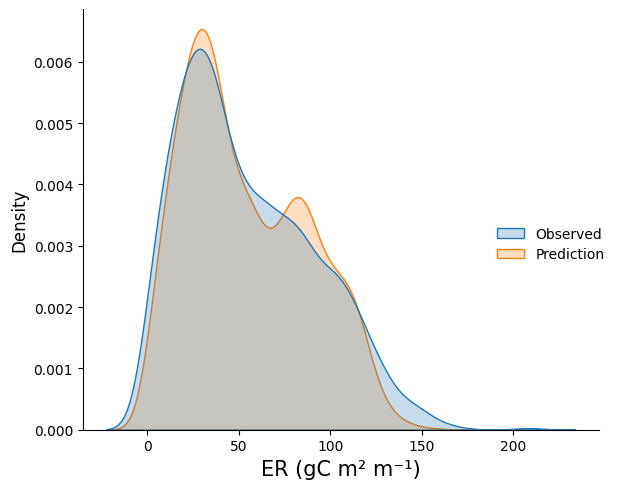

In [14]:
hist = ts[[var+'_SOLO_EC', var+'_prediction']].rename({var+'_SOLO_EC':'Observed', var+'_prediction':'Prediction'}, axis=1)
sns.displot(hist, kind="kde", fill=True)
plt.xlabel(var+' (gC m\N{SUPERSCRIPT TWO} m⁻¹)', fontsize=15)
plt.ylabel('Density', fontsize=12)
if var=='NEE':
    plt.axvline(0, c='grey', linestyle='--')
plt.tight_layout()
plt.savefig('/g/data/os22/chad_tmp/NEE_modelling/results/figs/'+var+'_kde_obs_pred.png')

### Per site annual means 

In [ ]:
df = ts.groupby('site').resample('Y').sum()

In [ ]:
df = df[[var+'_SOLO_EC', var+'_prediction']]
df = df.rename({var+'_SOLO_EC':'obs', var+'_prediction':'pred'}, axis=1)

In [ ]:
fig, ax =  plt.subplots(4,7,figsize=(20,10), sharex=True)
df.groupby('site').boxplot(subplots=True, ax=ax, rot=0, grid=False, fontsize=12)
if var == 'NEE':
    for a in ax.reshape(-1): 
        a.axhline(0, c='grey', linestyle='--');
fig.supylabel('Annual '+var+' (gC m\N{SUPERSCRIPT TWO} y⁻¹)', fontsize=16)
plt.tight_layout()
plt.savefig('/g/data/os22/chad_tmp/NEE_modelling/results/figs/'+var+'_boxplots_annual.png')

In [ ]:
# df.boxplot(column=var+'_prediction', by='site', figsize=(20,5), grid=False)
# plt.ylabel('Ozflux Annual NEE (gC m\N{SUPERSCRIPT TWO} y⁻¹)')
# plt.title('')
# plt.xlabel('')
# plt.suptitle('')
# plt.axhline(0, c='grey', linestyle='--');

## Collate gridded data for predictions

This data is used to predict on, results of this are stored here `/g/data/os22/chad_tmp/NEE_modelling/results/predicton_data/prediction_data_YYYY.nc`

In [ ]:
import sys
sys.path.append('/g/data/os22/chad_tmp/NEE_modelling/')
from collect_prediction_data import collect_prediction_data

In [ ]:
t1, t2='2003','2021'

In [ ]:
ds = collect_prediction_data(time_start=t1,
                             time_end=t2,
                             verbose=True,
                             export=False
                             )
ds